## **Administration Analysis and Figures for the Entire (Oct 2011 - July 2025) Dataset**
Here we are investigating trends in the dataset over time. We unfortunately do not have data for 2013, but we can look at trends over the four presidential administrations that the data covers: Obama Administration (Before Jan 21, 2017), First Trump Administration (from Jan 21, 2017 to Jan 20, 2020), Biden Administration (from Jan 21, 2020 to Jan 20, 2024), and Current Trump Administration (till end of data collection in July 2025).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
import datetime

In [2]:
# Load in the arrests_before_2023_clean data
# suppressing mixed type because there are null values
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    arrests_pre_2023 = pd.read_csv("Arrests 2011-2025 (clean).csv")

In [3]:
# Goal: sort the full dataset by date (use Janitor code)

In [4]:
#parses inconsistent date_time data. takes str as obj, returns datetime obj. wicked slow, but functional
def date_time(moment):
    moment = str(moment)
    #split into YYYY, MM, DD, HH:MM:SS or MM, DD, YYYY, HH:MM:SS
    pieces = moment.replace(" UTC", "").replace("/","-").strip().replace(" ", "-").split("-")

    #figure out which of the two formats this is
    year_ind = 2 if (len(pieces[0]) != 4) else  0

    #separate year, normalize formats
    year = int(pieces[year_ind])
    pieces.pop(year_ind)
    month = int(pieces[0])
    day = int(pieces[1])

    #handle blank timestamps, save to datetime obj & return
    try:
        hours, minutes, seconds = pieces[2].split(":")
        return datetime.datetime(year, month, day, int(hours), int(minutes), int(seconds))
    except IndexError:
        return datetime.datetime(year, month, day)

#normalize into datetime objects
arrests_pre_2023["Apprehension Date Time"] = arrests_pre_2023["Apprehension Date Time"].transform(date_time)

In [5]:
# actually sorting by date
arrests_pre_2023 = arrests_pre_2023.sort_values(by=['Apprehension Date Time'])
arrests_pre_2023

,Unnamed: 0,Apprehension AOR,Apprehension Criminality,Apprehension Date Time,Apprehension Method,Apprehension Site Landmark,Apprehension State,Apprehension Year,Birth Year,Citizenship Country,Departed Date,Departure Country,Ethnicity,Final Program,Final Program Group,Gender,Race,Worst Criminal Charge
228497,228497,San Antonio Area of Responsibility,NaN,2011-10-01 00:00:00,CAP Local Incarceration,"WESLACO CITY JAIL, TX",NaN,2011,NaN,MEXICO,NaN,NaN,NaN,NaN,NaN,Male,NaN,NaN
150910,150910,Houston Area of Responsibility,NaN,2011-10-01 00:00:00,CAP Federal Incarceration,"FED COASTAL BEND USM-ARANSAS, TX",NaN,2011,NaN,MEXICO,10/05/2011,NaN,NaN,NaN,NaN,Male,NaN,NaN
241714,241714,San Antonio Area of Responsibility,NaN,2011-10-01 00:00:00,CAP Local Incarceration,DIMMIT COUNTY JAIL - TX0640000,NaN,2011,NaN,MEXICO,10/03/2011,NaN,NaN,NaN,NaN,Male,NaN,NaN
264666,264666,San Francisco Area of Responsibility,NaN,2011-10-01 00:00:00,CAP Local Incarceration,SAN MATEO COUNTY JAIL - CA,NaN,2011,NaN,NICARAGUA,NaN,NaN,NaN,NaN,NaN,Male,NaN,NaN
81544,81544,San Antonio Area of Responsibility,NaN,2011-10-01 00:00:00,CAP Local Incarceration,"HIDALGO COUNTY JAIL, EDINBURG, TXN - TX1080000",NaN,2011,NaN,MEXICO,10/01/2011,NaN,NaN,NaN,NaN,Male,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742943,749907,Newark Area of Responsibility,2 Pending Criminal Charges,2025-07-29 00:18:22,Custodial Arrest,"NEW GENERAL AREA, NON-SPECIFIC",NEW JERSEY,2025,1987.0,DOMINICAN REPUBLIC,NaN,NaN,NaN,ERO Criminal Alien Program,ICE,Male,NaN,NaN
742944,749908,Newark Area of Responsibility,2 Pending Criminal Charges,2025-07-29 00:45:24,Custodial Arrest,PASSAIC COUNTY JAIL,NEW JERSEY,2025,1999.0,PERU,NaN,NaN,NaN,ERO Criminal Alien Program,ICE,Male,NaN,NaN
742945,749909,Newark Area of Responsibility,2 Pending Criminal Charges,2025-07-29 01:02:30,Custodial Arrest,PASSAIC COUNTY JAIL,NEW JERSEY,2025,1988.0,COLOMBIA,NaN,NaN,NaN,ERO Criminal Alien Program,ICE,Female,NaN,NaN
742946,749910,Atlanta Area of Responsibility,3 Other Immigration Violator,2025-07-29 01:13:16,Non-Custodial Arrest,"ATLANTA, GA",GEORGIA,2025,1984.0,GUATEMALA,NaN,NaN,NaN,Non-Detained Docket Control,ICE,Male,NaN,NaN


### Arrests
The most clear trend we can track here is simply the quantity of arrests over time. First, we use describe here to calculate summary statistics for the date time data. The reason we use date time is because every entry in the dataset has a time value, so it is essentially just a proxy for arrest count. The mean and middle 50% of our data is during the first Trump Administration. We can also see that the day with the most amount of arrests was March 26, 2012, which was in the Obama administration.

In [6]:
arrests_pre_2023["Apprehension Date Time"].describe()

count                          1695332
mean     2019-02-28 02:13:40.190083072
min                2011-10-01 00:00:00
25%                2016-02-12 11:01:45
50%                2019-03-13 06:28:30
75%                2022-11-29 13:18:15
max                2025-07-29 01:14:44
Name: Apprehension Date Time, dtype: object

In [7]:
arrests_pre_2023["Apprehension Date Time"].mode()

0   2012-03-26
Name: Apprehension Date Time, dtype: datetime64[ns]

In order to see the trend over administration, we graphed the arrests per week over time.

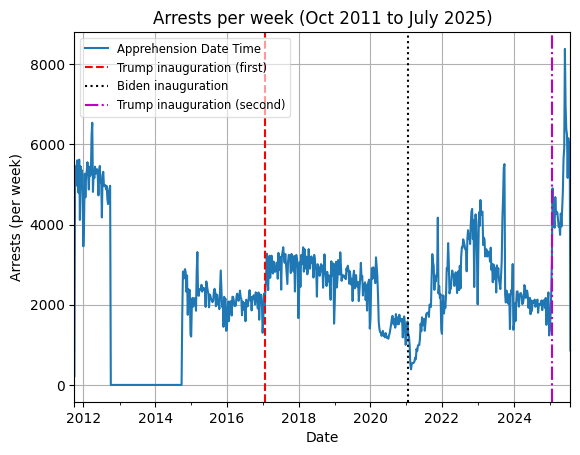

In [8]:
# groups data by week so that the graph is readable, then plots the counts of entries (and therefore the arrest count) per week
arrests_pre_2023.groupby(pd.Grouper(key="Apprehension Date Time", freq = "1W"))['Apprehension Date Time'].count().plot()
plt.xlabel('Date')
plt.ylabel('Arrests (per week)')
plt.title('Arrests per week (Oct 2011 to July 2025)')
plt.grid(True)

# these vertical lines show the change in administrations
plt.axvline(x = 2456.5, color = 'r', label = 'Trump inauguration (first)', ls = "--")
plt.axvline(x = 2665, color = 'k', label = 'Biden inauguration', ls = ":")
plt.axvline(x = 2874.5, color = 'm', label = 'Trump inauguration (second)', ls = "dashdot")

# legend is made smaller so graph is more readable
plt.legend(fontsize = "small", framealpha = 0.6)
plt.show()

Alt text: Line graph with the title "Arrests per week (Oct 2011 to July 2025)". The y-axis is arrests (per week) and it ranges from 0 to about 8500. The x-axis is date and it ranges from just before 2012 to about midway through 2025. There are three vertical lines on the graph: a red dashed line labeled "Trump inauguration (first)" which is located shortly after 2017, a black dotted line labeled "Biden inauguration" located just after 2020, and a pink dashed and dotted line labeled "Trump inauguration (second)" which is located just after 2025. In the period before the first Trump inauguration, the arrests (per week) begins at around 5500 and slowly declines until October 2012. Then there is no arrests data until October 2014. From October 2014 till the first Trump inauguration, the arrests per week quantity hovers around 2000. After the first Trump inauguration, the arrests per week sharply jumps to around 3000 and slowly declines to about 2500 until 2020, when they sharply decline to about 1000 until Biden's administration. During the first year of Biden's term, the arrests per week go from about 250 per week to about 2200. Then from 2022-2024, there is a sharp peak at the start of 2023 at 4000 and another peak of 5750 arrests per week in late 2023, but it decreases back to 2200 at the start of 2024. It hovers around 2000 arrests per week until Trump's second inauguration in 2025. Then it sharply increases to 4000 and then the highest point in the graph at just over 8000 arrests per week in early 2025.

**There is a clear correlation with administration here.** The two administrations with the highest peaks are the Obama administration in 2012 and the second Trump administration in 2025. There is a very quick turnaround between inauguration and change in arrest quantity. This is surprising because we expected to have about a six month gap between changes in administration and changes in ICE policy. The lowest point in this graph was from 2020-2022 (end of Trump's first administration and start of Biden's administration), which we speculate was due to the height of COVID policy and lockdowns. This is not particularly surprising. What is surprising is how the two Trump terms differ. His second term, thus far, has reached arrests per week numbers that are around double what his first term was. Biden's administration frequently has greater arrests per week than Trump's first term. 

### Citizenship Country
Early on in going through the data, we noticed that the majority of people arrested were citizens of Mexico. This makes some amount of sense geographically, (although Canada is not anywhere near Mexico here with only 2,937 arrests to the 843,000 of arrests of Mexican citizens) but we wanted to see if this changes throughout administrations.

In [9]:
arrests_pre_2023["Citizenship Country"].value_counts()

Citizenship Country
MEXICO            843044
GUATEMALA         163002
HONDURAS          150586
EL SALVADOR        91120
VENEZUELA          55589
                   ...  
GUAM                   1
ST. HELENA             1
COMOROS                1
EAST TIMOR             1
SINT EUSTATIUS         1
Name: count, Length: 223, dtype: int64

In [10]:
sum(arrests_pre_2023["Citizenship Country"] == "CANADA")

2937

Here we graphed the arrests per week by citizenship country. More specifically, we graphed whether the person arrested was a citizen of Mexico or not.

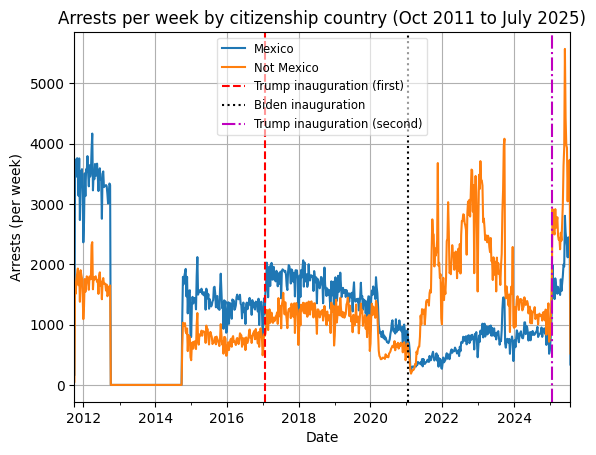

In [11]:
# separates out arrests by citizenship country and takes out any data that does not have a value for citizenship country
arr_country_dummies = pd.get_dummies(arrests_pre_2023[arrests_pre_2023["Citizenship Country"].notna()], columns = ["Citizenship Country"])

# creates a column containing all arrests of people who were not from Mexico
arr_country_dummies["Citizenship Country NOT Mexico"] = ~arr_country_dummies["Citizenship Country_MEXICO"]


arr_country_dummies.groupby(pd.Grouper(
    key="Apprehension Date Time", freq = "1W"))[["Citizenship Country_MEXICO", "Citizenship Country NOT Mexico"]].sum().plot()
plt.xlabel('Date')
plt.ylabel('Arrests (per week)')
plt.title('Arrests per week by citizenship country (Oct 2011 to July 2025)')
plt.grid(True)
plt.xticks()
plt.axvline(x = 2456.5, color = 'r', label = 'Trump inauguration (first)', ls = "--")
plt.axvline(x = 2665, color = 'k', label = 'Biden inauguration', ls = ":")
plt.axvline(x = 2874.5, color = 'm', label = 'Trump inauguration (second)', ls = "dashdot")
plt.legend(["Mexico", "Not Mexico", "Trump inauguration (first)", "Biden inauguration", "Trump inauguration (second)"],
           fontsize = "small", framealpha = 0.6)
plt.show()

Alt text: Line graph with the title "Arrests per week by citizenship country (Oct 2011 to July 2025)". The y-axis is arrests (per week) and it ranges from 0 to about 6000. The x-axis is date and it ranges from just before 2012 to about midway through 2025. There are three vertical lines on the graph: a red dashed line labeled "Trump inauguration (first)" which is located shortly after 2017, a black dotted line labeled "Biden inauguration" located just after 2020, and a pink dashed and dotted line labeled "Trump inauguration (second)" which is located just after 2025. There are two horizontal lines: a blue line containing the arrests per week data of Mexican citizens and an orange line containing the arrests per week data of non-Mexican citizens. In the period before the first Trump inauguration, the Mexican citizen arrests (per week) begins at around 3500 and slowly declines until October 2012. The non-Mexican citizen arrests are about 1700 during this period. Then there is no arrests data until October 2014. From October 2014 till the first Trump inauguration, the Mexican citizen arrests per week quantity hovers around 1300 and the non-Mexican citizen arrests hover around 800 per week. After the first Trump inauguration, the Mexican citizen arrests per week increase to around 1700 and slowly declines to about 1000 until 2020, when they sharply decline to about 800 until Biden's administration. During this time, the non-Mexican citizen arrests hover around 1000 per week until 2020, when they decline to 500 until Biden's administration. Here, the curves dramatically diverge. During Biden's term the Mexican citizen arrests start at about 500 per week and slowly increase to about 900 per week. The non-Mexican citizen arrests increase to about 3500 in 2023 and decrease back to 1000 at the end of Biden's term. At the start of Trump's second term, the non-Mexican citizen arrests sharply increase to about 2500 and then 5500 arrests per week. The Mexican citizen arrests increase from about 1500 to 2500 arrests per week.

**This isn't as obvious as the arrests data.** Most of the data appears to be roughly following the general trend of the arrests data. The most surprising thing is during Biden's term when the Mexican citizen arrest data does not peak in the same way as the rest of the data. Despite this graph, we still know that after 2020, Mexican citizens were still a majority of the ICE arrests. This peak of non-Mexican arrests might be a reflection of policy changes during the Biden administration

In [12]:
arrests_pre_2023[arrests_pre_2023["Apprehension Year"] >= 2021]["Citizenship Country"].value_counts()

Citizenship Country
MEXICO              195500
HONDURAS             68153
GUATEMALA            61826
VENEZUELA            53381
NICARAGUA            50062
                     ...  
BRUNEI                   1
FRENCH POLYNESIA         1
ANGUILLA                 1
EAST TIMOR               1
SINT EUSTATIUS           1
Name: count, Length: 209, dtype: int64

### State
Next, we wanted to investigate the arrests throughout the states. Texas unsurprisingly comes out on top with 220,000 arrests, but there are almost three times as many arrests from Texas, than from the next highest state, California with 78,168 arrests. It is important to note here that state data only started being collected in October of 2015, so this does not include data collected prior to then.

In [13]:
arrests_pre_2023["Apprehension State"].describe()

count     901580
unique        62
top        TEXAS
freq      221651
Name: Apprehension State, dtype: object

First we looked at the arrests per week in Texas and not in Texas.

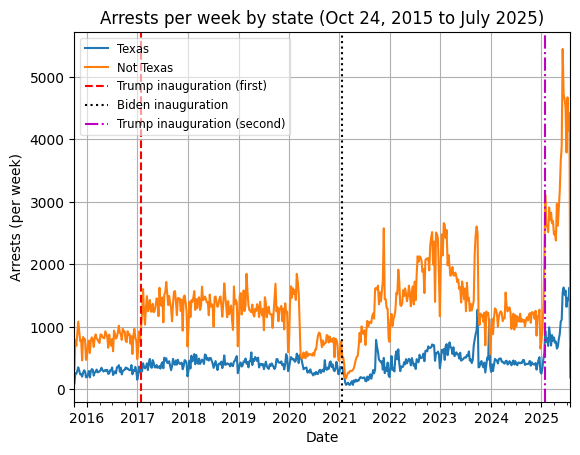

In [14]:
arr_state_dummies = pd.get_dummies(arrests_pre_2023[arrests_pre_2023["Apprehension State"].notna()], columns = ["Apprehension State"])
arr_state_dummies["Apprehension State NOT Texas"] = ~arr_state_dummies["Apprehension State_TEXAS"]
arr_state_dummies.groupby(pd.Grouper(
    key="Apprehension Date Time", freq = "1W"))[["Apprehension State_TEXAS", "Apprehension State NOT Texas"]].sum().plot()
plt.xlabel('Date')
plt.ylabel('Arrests (per week)')
plt.title('Arrests per week by state (Oct 24, 2015 to July 2025)')
plt.grid(True)
plt.axvline(x = 2456.5, color = 'r', label = 'Trump inauguration (first)', ls = "--")
plt.axvline(x = 2665, color = 'k', label = 'Biden inauguration', ls = ":")
plt.axvline(x = 2874.5, color = 'm', label = 'Trump inauguration (second)', ls = "dashdot")
plt.legend(["Texas", "Not Texas", "Trump inauguration (first)", "Biden inauguration", "Trump inauguration (second)"],
           fontsize = "small", framealpha = 0.6)
plt.show()

Alt text: Line graph with the title "Arrests per week by state (Oct 24, 2015 to July 2025)". The y-axis is arrests (per week) and it ranges from 0 to about 5700. The x-axis is date and it ranges from just before 2016 to about midway through 2025. There are three vertical lines on the graph: a red dashed line labeled "Trump inauguration (first)" which is located shortly after 2017, a black dotted line labeled "Biden inauguration" located just after 2020, and a pink dashed and dotted line labeled "Trump inauguration (second)" which is located just after 2025. There are two horizontal lines: a blue line containing the arrests per week data in Texas and an orange line containing the arrests per week data not in Texas. In the period before the first Trump inauguration, the Texas arrests (per week) begins at around 250 and slowly increases until the first Trump administration. The non-Texas arrests are about 700-800 during this period. After the first Trump inauguration, the Texas arrests per week stay around 300-400 per week. During this time, the non-Texas arrests hover around 1300 per week until 2020, when they decline to 500 until Biden's administration. Here, the curves diverge. During Biden's term the Texas arrests start at about 100 per week and slowly increase to about 450 per week (with a small peak in 2023). The non-Texas arrests increase to about 2500 in 2023 and decrease back to 1000 at the end of Biden's term. At the start of Trump's second term, the non-Texas arrests sharply increase to about 2700 and then 5500 arrests per week. The Texas arrests increase from about 800 to 1500 arrests per week.

**This appears to just be a reflection of the arrests data.** There do not appear to be any strange results here. Texas arrests do not decrease much during the height of COVID, which is likely due to the minimal lockdown policies in Texas at the time. It is interesting to see how much of the data is just from Texas, though.

We then wondered what the top five states (Texas, California, Florida, New York, and Georgia) look like here.

In [15]:
arrests_pre_2023[arrests_pre_2023["Apprehension State"].notna()]["Apprehension State"].value_counts()[: 5]

Apprehension State
TEXAS         221651
CALIFORNIA     78168
FLORIDA        64424
NEW YORK       50289
GEORGIA        46856
Name: count, dtype: int64

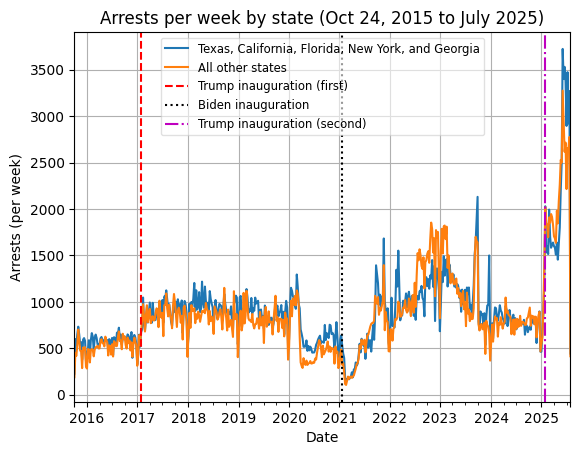

In [16]:
arr_state_dummies["Apprehension State Top Five"] = arr_state_dummies["Apprehension State_TEXAS"] + arr_state_dummies["Apprehension State_CALIFORNIA"] + arr_state_dummies["Apprehension State_FLORIDA"] + arr_state_dummies["Apprehension State_NEW YORK"] + arr_state_dummies["Apprehension State_GEORGIA"]
arr_state_dummies["Apprehension State NOT Top Five"] = ~arr_state_dummies["Apprehension State Top Five"]
arr_state_dummies.groupby(pd.Grouper(
    key="Apprehension Date Time", freq = "1W"))[["Apprehension State Top Five", "Apprehension State NOT Top Five"]].sum().plot()
plt.xlabel('Date')
plt.ylabel('Arrests (per week)')
plt.title('Arrests per week by state (Oct 24, 2015 to July 2025)')
plt.grid(True)
plt.axvline(x = 2456.5, color = 'r', label = 'Trump inauguration (first)', ls = "--")
plt.axvline(x = 2665, color = 'k', label = 'Biden inauguration', ls = ":")
plt.axvline(x = 2874.5, color = 'm', label = 'Trump inauguration (second)', ls = "dashdot")
plt.legend(["Texas, California, Florida, New York, and Georgia", 
            "All other states", "Trump inauguration (first)", "Biden inauguration", "Trump inauguration (second)"],
           fontsize = "small", framealpha = 0.6)
plt.show()

Alt text: Line graph with the title "Arrests per week by state (Oct 24, 2015 to July 2025)". The y-axis is arrests (per week) and it ranges from 0 to about 5700. The x-axis is date and it ranges from just before 2016 to about midway through 2025. There are three vertical lines on the graph: a red dashed line labeled "Trump inauguration (first)" which is located shortly after 2017, a black dotted line labeled "Biden inauguration" located just after 2020, and a pink dashed and dotted line labeled "Trump inauguration (second)" which is located just after 2025. There are two horizontal lines: a blue line containing the arrests per week data in Texas, California, Florida, New York, and Georgia and an orange line containing the arrests per week data not in these states. Both of these lines are essentially at the same values for the whole graph, so they will be described at the same time. In the period before the first Trump inauguration, the arrests (per week) hovers at aroung 500 per week until the first Trump administration. Then, the arrests per week stay around 800 per week until they sharply decrease in 2020 to around 500 per week. During the Biden administration, the arrests go from aroung 250 per week to a peak of 1500 in 2023 and then they decease to 700 at the end of his term. At the start of Trump's second term, the arrests sharply increase to about 1700 and then 3400 arrests per week.

This graph just shows that the combination of arrest data from the top five states (Texas, California, Florida, New York, and Georgia) is about equivalent to the arrest data from the entire rest of the dataset. There is not an administration correlation here.

### Gender
Now, on to gender! Due to the relatively small amount of data of "unknown" gender (1337 unknown vs. 226,969 women), it was not included in the graph. We wonder what the one entry of gender of "IIDS ETL NULL" means and what it means to have that as your gender.

In [17]:
arrests_pre_2023["Gender"].describe()

count     1695332
unique          4
top          Male
freq      1467025
Name: Gender, dtype: object

In [18]:
arrests_pre_2023["Gender"].unique()

array(['Male', 'Female', 'Unknown', 'IIDS ETL NULL'], dtype=object)

In [19]:
arrests_pre_2023["Gender"].value_counts()

Gender
Male             1467025
Female            226969
Unknown             1337
IIDS ETL NULL          1
Name: count, dtype: int64

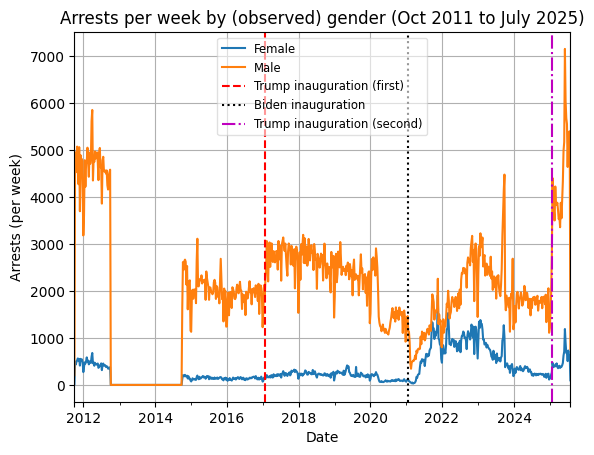

In [20]:
arr_gender_dummies = pd.get_dummies(arrests_pre_2023, columns = ["Gender"])
arr_gender_dummies.groupby(pd.Grouper(
    key="Apprehension Date Time", freq = "1W"))[["Gender_Female", "Gender_Male"]].sum().plot()
plt.xlabel('Date')
plt.ylabel('Arrests (per week)')
plt.title('Arrests per week by (observed) gender (Oct 2011 to July 2025)')
plt.grid(True)
plt.axvline(x = 2456.5, color = 'r', label = 'Trump inauguration (first)', ls = "--")
plt.axvline(x = 2665, color = 'k', label = 'Biden inauguration', ls = ":")
plt.axvline(x = 2874.5, color = 'm', label = 'Trump inauguration (second)', ls = "dashdot")
plt.legend(["Female", "Male", "Trump inauguration (first)", "Biden inauguration", "Trump inauguration (second)"],
           fontsize = "small", framealpha = 0.6)
plt.show()

Alt text: Line graph with the title "Arrests per week by (observed) gender (Oct 2011 to July 2025)". The y-axis is arrests (per week) and it ranges from 0 to about 7500. The x-axis is date and it ranges from just before 2012 to about midway through 2025. There are three vertical lines on the graph: a red dashed line labeled "Trump inauguration (first)" which is located shortly after 2017, a black dotted line labeled "Biden inauguration" located just after 2020, and a pink dashed and dotted line labeled "Trump inauguration (second)" which is located just after 2025. There are two horizontal lines: a blue line containing the arrests per week data in of people labeled as "Female" and an orange line containing the arrests per week data of those labeled "Male". From October 2011 till October 2012, the Male line hovers aroung 4700 arrests per week and the Female line hovers around 500. Then from October 2012 to October 2014 there is no data. From October 2015 until the first Trump inauguration, the Male arrests (per week) hovers around 2000 per week and the Female arrests stay constant at around 100 per week. During the first Trump term, the Male arrests per week start around 2700 and slowly decrease to 2000 at the start of 2020. Then they sharply decline to 1000 until the begining of the Biden administration. During Trump's term, the Female arrests stay at about 200 per week and then decrease down to 50 in 2020. During Biden's term the Male arrests start at about 500 per week and peak at about 3000 per week at the start of 2023 and then decrease to about 1800 in 2024. The Female arrests also peak in Biden's term. Tehy go from about 50 per week to 1000 per week at the start of 2023 and then they decrease to about 100 per week at the end of his term. In Trump's second term, the Male arrests sharply increase to 4000 and then 7000 arrests per week and the Female arrests increase to 400 and then peak at 1100 per week.

This graph appears to reflect the larger arrests data, although the overall trend is largely absent in the Female data (until Biden's term).

### Ethnicity
The ethnicity categories in the dataset are Hispanic and not Hispanic (and unknown). The vast majority of the dataset contains arrests of Hispanic people. That is unsurprising, but nonetheless concerning, since it is another glaring piece of evidence showing the institutionalized racism in our policing. This data started being reported in October 2015, but stopped being reported in October 2023 (which is also concerning).

In [21]:
arrests_pre_2023["Ethnicity"].describe()

count              836033
unique                  3
top       Hispanic Origin
freq               760145
Name: Ethnicity, dtype: object

In [22]:
arrests_pre_2023["Ethnicity"].unique()

array([nan, 'Hispanic Origin', 'Not of Hispanic Origin', 'Unknown'],
      dtype=object)

In [23]:
arrests_pre_2023["Ethnicity"].value_counts()

Ethnicity
Hispanic Origin           760145
Not of Hispanic Origin     60874
Unknown                    15014
Name: count, dtype: int64

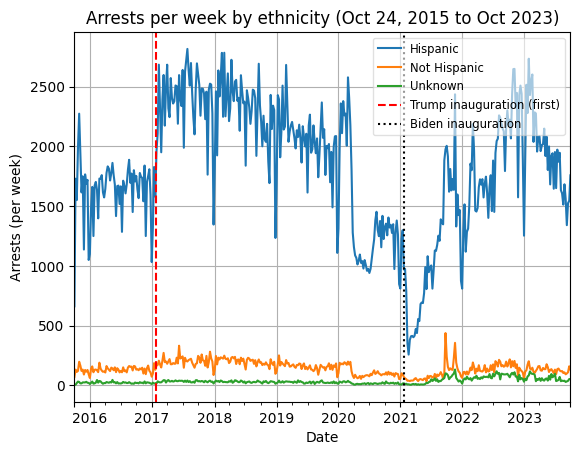

In [24]:
arr_ethnicity_dummies = pd.get_dummies(arrests_pre_2023[arrests_pre_2023["Ethnicity"].notna()], columns = ["Ethnicity"])
arr_ethnicity_dummies.groupby(pd.Grouper(
    key="Apprehension Date Time", freq = "1W"))[["Ethnicity_Hispanic Origin", "Ethnicity_Not of Hispanic Origin", "Ethnicity_Unknown"]].sum().plot()
plt.xlabel('Date')
plt.ylabel('Arrests (per week)')
plt.title('Arrests per week by ethnicity (Oct 24, 2015 to Oct 2023)')
plt.grid(True)
plt.axvline(x = 2456.5, color = 'r', label = 'Trump inauguration (first)', ls = "--")
plt.axvline(x = 2665, color = 'k', label = 'Biden inauguration', ls = ":")
plt.axvline(x = 2874.5, color = 'm', label = 'Trump inauguration (second)', ls = "dashdot")
plt.legend(["Hispanic", "Not Hispanic", "Unknown", "Trump inauguration (first)", "Biden inauguration"],
           fontsize = "small", framealpha = 0.6)
plt.show()

Alt text: Line graph with the title "Arrests per week by ethnicity (Oct 24, 2015 to Oct 2023)". The y-axis is arrests (per week) and it ranges from 0 to about 3000. The x-axis is date and it ranges from just before 2016 to towards the end of 2023. There are two vertical lines on the graph: a red dashed line labeled "Trump inauguration (first)" which is located shortly after 2017, and a black dotted line labeled "Biden inauguration" located just after 2020. There are three horizontal lines: a blue line containing the arrests per week data of Hispanic people, an orange line containing the arrests per week data of non-Hispanic people, and a green line containing the arrests per week data of people with an unknown ethnicity. Over the whole dataset, the unknown line hovers just above 0 and has a small peak in late 2021 to about 100 arrests per week and it slowly decreases to about 50 by October 2023. The non-Hispanic line hovers around 200-250 arrests per week for most of the dataset with a peak to 400 in late 2021, and after that it decreases to about 100 per week by October 2023. The Hispanic line is not constant over the graph. In the period before the first Trump inauguration, the Hispanic arrests hover around 1600 per week. During Trump's first term, the Hispanic arrests start at around 2400 per week and slowly decrease until 2020 when they sharply decrease to about 1250 until Biden's administration. In Biden's term, the Hispanic arrests line starts at 250 then increases to a peak of 2400 at the end of 2021 and then increases to a peak of 2600 at the start of 2023. Then the Hispanic arrests decrease to about 1500 per week.

This graph just once again shows how much of those arrested are Hispanic. This is indicative of profiling.

### Race
The race categories in the dataset are White, Black, Asian or Pacific Islander, American Indian or Alaskan Native, and Hispanic (and unknown). We did not include American Indian or Alaskan Native or Hispanic in our graph because of their low relative frequency. Just like the ethnicity data, this stopped being reported in October of 2023.

In [25]:
arrests_pre_2023["Race"].describe()

count     1016615
unique          6
top         White
freq       860123
Name: Race, dtype: object

In [26]:
arrests_pre_2023["Race"].unique()

array([nan, 'White', 'Unknown', 'Black', 'Asian or Pacific Islander',
       'American Indian or Alaskan Native', 'Hispanic'], dtype=object)

In [27]:
arrests_pre_2023["Race"].value_counts()

Race
White                                860123
Unknown                               97410
Black                                 43418
Asian or Pacific Islander             14956
American Indian or Alaskan Native       706
Hispanic                                  2
Name: count, dtype: int64

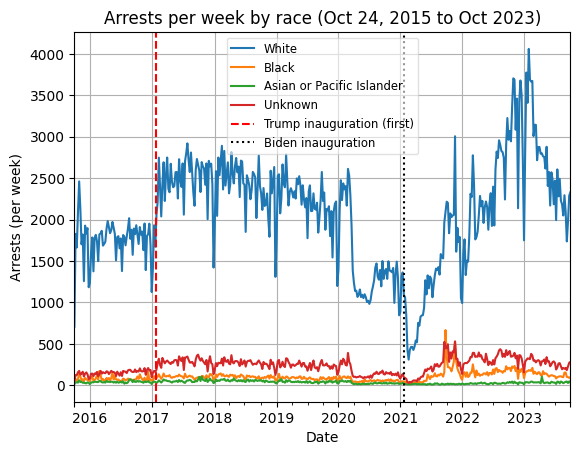

In [28]:
arr_race_dummies = pd.get_dummies(arrests_pre_2023[arrests_pre_2023["Race"].notna()], columns = ["Race"])
arr_race_dummies.groupby(pd.Grouper(
    key="Apprehension Date Time", freq = "1W"))[["Race_White", "Race_Black", "Race_Asian or Pacific Islander", "Race_Unknown"]].sum().plot()
plt.xlabel('Date')
plt.ylabel('Arrests (per week)')
plt.title('Arrests per week by race (Oct 24, 2015 to Oct 2023)')
plt.grid(True)
plt.axvline(x = 2456.5, color = 'r', label = 'Trump inauguration (first)', ls = "--")
plt.axvline(x = 2665, color = 'k', label = 'Biden inauguration', ls = ":")
plt.axvline(x = 2874.5, color = 'm', label = 'Trump inauguration (second)', ls = "dashdot")
plt.legend(["White", "Black", "Asian or Pacific Islander", "Unknown", 
            "Trump inauguration (first)", "Biden inauguration"],
           fontsize = "small", framealpha = 0.6)
plt.show()

Alt text: Line graph with the title "Arrests per week by race (Oct 24, 2015 to Oct 2023)". The y-axis is arrests (per week) and it ranges from 0 to about 4200. The x-axis is date and it ranges from just before 2016 to towards the end of 2023. There are two vertical lines on the graph: a red dashed line labeled "Trump inauguration (first)" which is located shortly after 2017, and a black dotted line labeled "Biden inauguration" located just after 2020. There are four horizontal lines: a blue line containing the arrests per week data of White people, an orange line containing the arrests per week data of Black people, a green line containing the arrests per week data of people Asian people or Pacific Islanders, and a red line indicating those with an unknown race. Over the whole dataset, the Asian or Pacific Islander line hovers just above 0. The Black arrests like also hovers just above 0 until late 2021 when it peaks at about 600 arrests per week. Then it decreases to about 100 arrests by late 2023. The unknown line hovers around 100 arrests per week until the first Trump term, when it hovers around 300 per week until early 2020 when it drops back down to about 100. Then it has a sharp peak of 500 in late 2021 and then it slowly decreases to about 300 at the end of 2023. The majority of the data is in the White line. Before the first Trump administraion, the White line hovers around 1750 arrests per week. After the Trump administration began, it decreased from 2500 down to 2000 in early 2020. Then it sharply decreased to about 1400 at the end of his term. In Biden's term, the White line rose from 500 per week to a peak of 4000 at the start of 2023 and then decreased to 2000 by the end of 2023.

This appears to be a reflection of the Ethnicity graph rather than anything else.